In [16]:
import pandas as pd
import numpy as np
import mysql
from mysql.connector import connect, Error
import plotly.express as px
import plotly.graph_objects as go
import kaleido

In [17]:
state_names = ["Alaska", "Alabama", "Arkansas", "Arizona", "California", "Colorado", "Connecticut", "District of Columbia", "Delaware", "Florida", "Georgia", 
               "Hawaii", "Iowa", "Idaho", "Illinois", "Indiana", "Kansas", "Kentucky", "Louisiana",  "Maryland", "Massachusetts", "Maine", "Michigan", "Minnesota", 
               "Missouri", "Mississippi", "Montana", "North Carolina", "North Dakota", "Nebraska", "Nevada", "New Hampshire", "New Jersey", "New Mexico",  
               "New York", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Virginia", 
               "Vermont", "Washington", "Wisconsin", "West Virginia", "Wyoming"]
states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "DC", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]
state_names.sort()

sd = dict(zip(state_names, states))
st = dict(zip(states, state_names))

In [18]:
cnx = mysql.connector.connect(user=f'{user}', password=f'{password}',
                              host=f'{host}', database=f"{database}")
cursor = cnx.cursor()
query  = "select * from VW_TWEET_TEXT"
tweets = pd.read_sql(query,cnx)
#users.rename(columns={'TWEET_ID':'ID', 'TWEET_TEXT':'TWEET'}, inplace=True)
tweets

,TWEET_ID,TWEET_TEXT
0,1189699142190157824,@HopePeace_810 @RepSwalwell @SpeakerPelosi Ukr...
1,1189756083771977728,DOJ Clears Trump of Wrongdoing in Call with Ze...
2,1189766623055486977,DOJ Clears Trump of Wrongdoing in Call with Ze...
3,1189771973229993985,@HelenSpade4 @luke_mo_ @TroyBurch3 @DV652 @Rep...
4,1189772566489128966,@HelenSpade4 @luke_mo_ @TroyBurch3 @DV652 @Rep...
...,...,...
10834,796140241950306304,Vote Hillary Clinton idc if she a liar y'all b...
10835,796140242008965122,if Hilary wins the election she's gonna have t...
10836,796140242092879873,Donald Trump defiende la tenencia de armas en ...
10837,796140242256490497,Police respond to shooting near Los Angeles-ar...


In [19]:
query  = "SELECT * FROM USERS"
users = pd.read_sql(query,cnx)

In [20]:
users

,AUTHOR_ID,CREATED_AT,LOCATION,DESCRIPTION,FOLLOWERS_COUNT,FOLLOWING_COUNT,LISTED_COUNT,TWEET_COUNT,VERIFIED
0,1000004748177805312,2018-05-25,Rio de Janeiro,Conservadora. Mestre em Direito e Economia. Em...,169325,107105,140,5954,False
1,1000027957,2012-12-09,nan,"Comentadores de bancada, políticos profissiona...",214,16,9,14741,False
2,1000256803,2012-12-09,Italy,Pak-Italian,839,1784,0,14459,False
3,10003742,2007-11-06,"New York, NY",Anchor / Sr. Correspondent PBS @NewsHour & @Sc...,32362,1632,1002,21815,True
4,100077645,2009-12-28,"Los Angeles, California","All Your Favorite Entertainment News, Pop-Cult...",504344,13462,1539,62184,True
...,...,...,...,...,...,...,...,...,...
14207,999442590821826560,2018-05-24,USA,#TeamJustice. I cuss. I rant. I love all anima...,2015,3566,2,45241,False
14208,99963885,2009-12-28,"Houston, TX",Tweets are my own and should never be taken se...,232,514,0,11120,False
14209,99973010,2009-12-28,"Porto Recanati, Marche","Artigiano. Ho solo oggetti fatti da me, 100% m...",252,119,6,13374,False
14210,999771618,2012-12-09,Latinoamérica,"Los trabajadores no tienen nada que perder, sa...",2720,2788,0,219260,False


In [21]:
df2=users.copy()
df2[["LOCATION"]] = df2[["LOCATION"]].replace(',\ USA$', '',regex = True)
df2[["LOCATION"]] = df2[["LOCATION"]].replace('.*,\ (?=[A-Z]{2}$)', '',regex = True)
df2[["LOCATION"]] = df2[["LOCATION"]].replace('.*\ (?=[A-Z]{2}$)', '',regex = True)
df2[["LOCATION"]] = df2[["LOCATION"]].replace('.*,\ ', '',regex = True)
df2[["LOCATION"]] = df2[["LOCATION"]].replace('.*,(?=[A-Z]{2}$)', '',regex = True)
df2[["LOCATION"]] = df2[["LOCATION"]].replace({"LOCATION": sd})

In [22]:
df3 = df2.query('LOCATION in @states')
state_users = df3.groupby('LOCATION').count()['AUTHOR_ID']

In [23]:
df3

,AUTHOR_ID,CREATED_AT,LOCATION,DESCRIPTION,FOLLOWERS_COUNT,FOLLOWING_COUNT,LISTED_COUNT,TWEET_COUNT,VERIFIED
3,10003742,2007-11-06,NY,Anchor / Sr. Correspondent PBS @NewsHour & @Sc...,32362,1632,1002,21815,True
4,100077645,2009-12-28,CA,"All Your Favorite Entertainment News, Pop-Cult...",504344,13462,1539,62184,True
5,1000781118,2012-12-10,IN,Deathvestation is a online magazine that cover...,41,45,0,6689,False
9,100146431,2009-12-29,OK,,2623,3821,22,414807,False
12,1001796463389749248,2018-05-30,TX,,4057,699,4,137312,False
...,...,...,...,...,...,...,...,...,...
14194,996551365,2012-12-08,CA,"Writer, storyteller, latina. Periodista chilen...",878,885,28,1905,False
14195,996576014,2012-12-08,WA,amosc: wheresfreddo.,294,223,0,6783,False
14196,9967532,2007-11-05,SC,Non-native Charlestonian. @EaterCarolinas Edit...,4915,1028,132,25769,True
14204,999099590610632704,2018-05-23,PA,History History Politics,46,484,0,23055,False


In [24]:
pops = pd.read_csv('statepop.csv')

In [25]:
pops = pops.replace({"State": sd})
pops = pops.sort_values('State')

In [26]:
pops['users']=state_users.values
pops['per_mil']=pops['users']/pops['Pop']*1000000
pops

,State,Pop,users,per_mil
1,AK,731545,6,8.201819
0,AL,4903185,33,6.730319
3,AR,3017825,13,4.307738
2,AZ,7278717,56,7.693664
4,CA,39512223,395,9.996907
5,CO,5758736,26,4.514880
6,CT,3565287,44,12.341222
8,DC,705749,159,225.292562
7,DE,973764,9,9.242486
9,FL,21477737,201,9.358528


In [27]:
pops_formap = pops[pops.State != 'DC']
pops_formap

,State,Pop,users,per_mil
1,AK,731545,6,8.201819
0,AL,4903185,33,6.730319
3,AR,3017825,13,4.307738
2,AZ,7278717,56,7.693664
4,CA,39512223,395,9.996907
5,CO,5758736,26,4.514880
6,CT,3565287,44,12.341222
7,DE,973764,9,9.242486
9,FL,21477737,201,9.358528
10,GA,10617423,100,9.418481


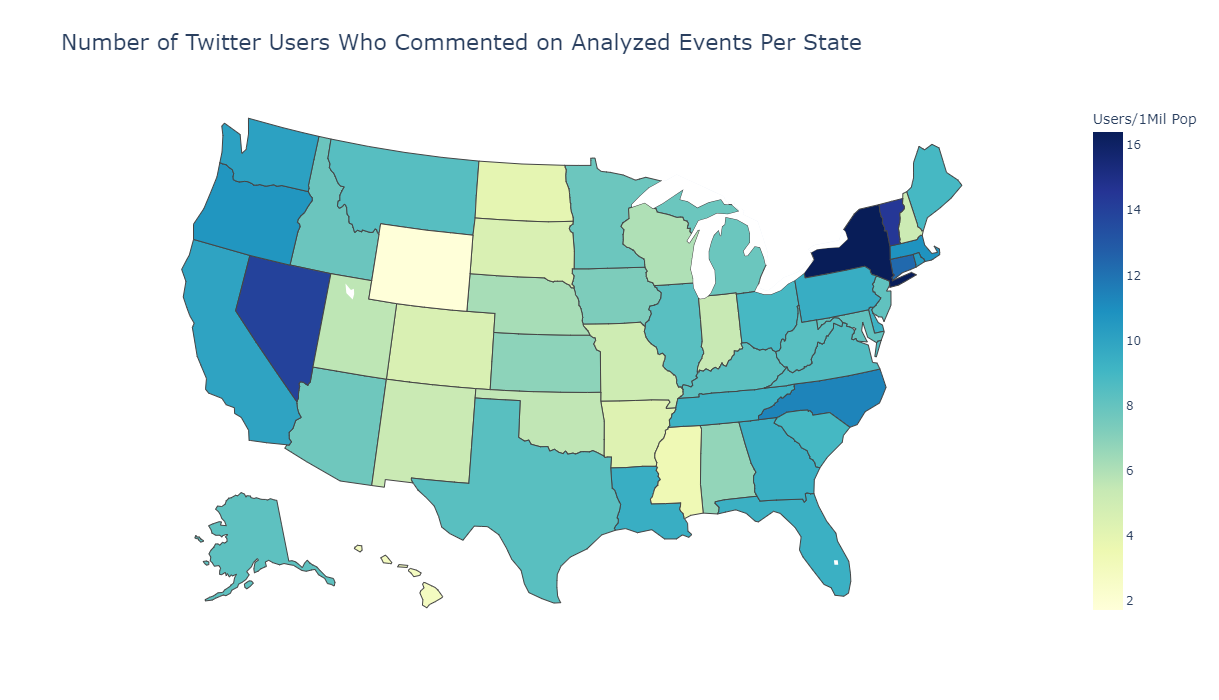

In [28]:
fig = go.Figure(data=go.Choropleth(
    locations=pops_formap['State'], # Spatial coordinates
    z = pops_formap['per_mil'], # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'YlGnBu',
    colorbar_title = "Users/1Mil Pop",
    
    
))

fig.update_layout(
    title_text = 'Number of Twitter Users Who Commented on Analyzed Events Per State',
    title_font_size = 22,
    
    geo_scope='usa', # limite map scope to USA
    width=1200, height=700
)

In [14]:
pops['ratio']=pops['users']/pops['Pop']*100000

In [15]:
fig.write_image("choropleth.png")